In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from scipy import stats,signal
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
normal_file_names = glob.glob("./normal/*.csv")

In [4]:
vertical_misalignment_file_names_051mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/0.51mm/*.csv")
vertical_misalignment_file_names_063mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/0.63mm/*.csv")
vertical_misalignment_file_names_127mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/1.27mm/*.csv")
vertical_misalignment_file_names_140mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/1.40mm/*.csv")
vertical_misalignment_file_names_178mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/1.78mm/*.csv")
vertical_misalignment_file_names_190mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/1.90mm/*.csv")

In [5]:
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header=None)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n  

In [6]:
data_normal = dataReader(normal_file_names)

In [3]:
import os
import glob
import pandas as pd

# Base path for subfolders
base_path = "/kaggle/input/vertical-misalignment/vertical-misalignment"
subfolders = os.listdir(base_path)
print("Contents of Nested Directory:", subfolders)

# Gather CSV files from all subfolders
all_file_names = []
for subfolder in subfolders:
    folder_path = os.path.join(base_path, subfolder)
    csv_files = glob.glob(f"{folder_path}/*.csv")
    all_file_names.extend(csv_files)

print(f"Total CSV Files Found: {len(all_file_names)}")
print("List of Files:", all_file_names)

# Data reading function
def dataReader(path_names):
    data_n = pd.DataFrame()
    for file_path in path_names:
        try:
            print(f"Reading file: {file_path}")
            low_data = pd.read_csv(file_path, header=None)  # Assuming no headers
            if low_data.empty:
                print(f"Warning: File {file_path} is empty.")
            data_n = pd.concat([data_n, low_data], ignore_index=True)
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")
    return data_n

# Load all data from CSV files
data_combined = dataReader(all_file_names)

# Display results
print("Combined Data Info:")
print(data_combined.info())
print("First 5 rows of Combined Data:")
print(data_combined.head())


Contents of Nested Directory: ['0.51mm', '0.63mm', '1.40mm', '1.90mm', '1.27mm', '1.78mm']
Total CSV Files Found: 301
List of Files: ['/kaggle/input/vertical-misalignment/vertical-misalignment/0.51mm/53.6576.csv', '/kaggle/input/vertical-misalignment/vertical-misalignment/0.51mm/16.9984.csv', '/kaggle/input/vertical-misalignment/vertical-misalignment/0.51mm/37.6832.csv', '/kaggle/input/vertical-misalignment/vertical-misalignment/0.51mm/56.7296.csv', '/kaggle/input/vertical-misalignment/vertical-misalignment/0.51mm/28.4672.csv', '/kaggle/input/vertical-misalignment/vertical-misalignment/0.51mm/16.1792.csv', '/kaggle/input/vertical-misalignment/vertical-misalignment/0.51mm/61.2352.csv', '/kaggle/input/vertical-misalignment/vertical-misalignment/0.51mm/36.0448.csv', '/kaggle/input/vertical-misalignment/vertical-misalignment/0.51mm/42.8032.csv', '/kaggle/input/vertical-misalignment/vertical-misalignment/0.51mm/34.2016.csv', '/kaggle/input/vertical-misalignment/vertical-misalignment/0.51mm/

In [4]:
data_combined.shape

(75250000, 8)

In [5]:
data_combined.head(20)

,0,1,2,3,4,5,6,7
0,-0.86232,1.26110,0.265810,1.238900,-0.18802,-0.027365,-0.104900,-0.164470
1,-0.84612,1.29650,-0.017689,1.187900,-0.17431,-0.025594,-0.199640,0.079586
2,-0.89970,1.17710,0.364380,0.621810,-0.17991,-0.028559,-0.219850,-0.106550
3,-0.93687,1.43210,0.861810,-0.247380,-0.17692,-0.026980,-0.058111,0.002679
4,-0.84568,1.27970,0.697200,-0.964310,-0.18913,-0.029387,-0.133610,0.006402
5,-0.90302,1.39820,1.025300,-1.285900,-0.17712,-0.027943,0.003642,-0.116600
6,-0.85979,1.02950,0.051613,-1.209700,-0.19220,-0.030728,-0.029880,0.136660
7,-0.81454,1.09420,0.611510,-0.632540,-0.16966,-0.028334,-0.028333,-0.211250
8,-0.85984,0.62314,0.038206,-0.012246,-0.17757,-0.030311,-0.152630,0.224540
9,-0.83304,0.67735,0.627080,0.715410,-0.16930,-0.029156,-0.154910,-0.163910


In [6]:
data_combined.describe()

,0,1,2,3,4,5,6,7
count,7.525000e+07,7.525000e+07,7.525000e+07,7.525000e+07,7.525000e+07,7.525000e+07,7.525000e+07,7.525000e+07
mean,-6.673315e-05,1.096793e-02,-1.913167e-04,1.634652e-04,2.190710e-03,2.874298e-03,1.131062e-02,1.261608e-02
std,1.721212e+00,8.925357e-01,4.661473e-01,4.281870e-01,4.205958e-01,4.433998e-02,7.581759e-01,1.671813e-01
min,-1.574700e+00,-1.900700e+01,-5.206700e+00,-5.636000e+00,-1.472900e+01,-5.990100e-01,-6.730800e+00,-1.219500e+00
25%,-7.234300e-01,-5.896400e-01,-3.054500e-01,-1.777800e-01,-8.414100e-02,-2.258400e-02,-4.138600e-01,-1.199800e-01
50%,-6.577900e-01,6.710100e-02,2.133700e-02,-6.857600e-05,1.724900e-02,3.862300e-03,1.109800e-02,-3.065000e-03
75%,-5.469900e-01,6.807200e-01,3.267600e-01,1.753500e-01,1.127700e-01,2.949400e-02,4.395800e-01,1.291900e-01
max,5.114900e+00,3.870900e+00,3.444200e+00,4.928500e+00,7.224300e+00,5.881600e-01,6.341200e+00,9.288300e-01


In [7]:
# Column Descriptions:

# Column 1: Tachometer signal used to estimate the rotation frequency.

# Columns 2 to 4: Underhang bearing accelerometer measurements 
# in the axial, radial, and tangential directions.

# Columns 5 to 7: Overhang bearing accelerometer measurements 
# in the axial, radial, and tangential directions.

# Column 8: Microphone data.

features_list = ["Tachometer","UBA_axial","UBA_radial","UBA_tangential","OBA_axial","OBA_radial","OBA_tangential","Microphone"]

In [8]:
import pandas as pd
import numpy as np
import glob

# Function to read data from given paths
def dataReader(path_names):
    """
    Reads and concatenates CSV files into a single DataFrame.
    Parameters:
        path_names (list): List of file paths.
    Returns:
        DataFrame: Combined data from all files.
    """
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i, header=None)
        data_n = pd.concat([data_n, low_data], ignore_index=True)
    return data_n

# Optimized down-sampling function
def fastDownSampler(data, b):
    """
    Efficiently down-sample the data by averaging every 'b' rows.
    Parameters:
        data (DataFrame): The DataFrame to be down-sampled.
        b (int): The number of rows to group and average.
    Returns:
        DataFrame: A down-sampled DataFrame.
    """
    data_array = data.to_numpy()  # Convert DataFrame to NumPy array
    num_groups = len(data_array) // b  # Calculate the number of complete groups
    reshaped_data = data_array[:num_groups * b].reshape(num_groups, b, -1)  # Reshape for grouping
    downsampled_array = reshaped_data.mean(axis=1)  # Compute the mean for each group
    return pd.DataFrame(downsampled_array, columns=data.columns)  # Convert back to DataFrame

# Paths for data directories (adjust paths as necessary)
normal_file_names = glob.glob("./normal/*.csv")
vertical_misalignment_file_names_051mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/0.51mm/*.csv")
vertical_misalignment_file_names_063mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/0.63mm/*.csv")
vertical_misalignment_file_names_127mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/1.27mm/*.csv")
vertical_misalignment_file_names_140mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/1.40mm/*.csv")
vertical_misalignment_file_names_178mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/1.78mm/*.csv")
vertical_misalignment_file_names_190mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/1.90mm/*.csv")

# Reading data
data_normal = dataReader(normal_file_names)
data_vertical_misalignment_051mm = dataReader(vertical_misalignment_file_names_051mm)
data_vertical_misalignment_063mm = dataReader(vertical_misalignment_file_names_063mm)
data_vertical_misalignment_127mm = dataReader(vertical_misalignment_file_names_127mm)
data_vertical_misalignment_140mm = dataReader(vertical_misalignment_file_names_140mm)
data_vertical_misalignment_178mm = dataReader(vertical_misalignment_file_names_178mm)
data_vertical_misalignment_190mm = dataReader(vertical_misalignment_file_names_190mm)

# Down-sampling the data if it is not empty
sampling_rate = 100  # Adjust sampling rate as needed
if not data_normal.empty:
    data_normal = fastDownSampler(data_normal, b=sampling_rate)

if not data_vertical_misalignment_051mm.empty:
    data_vertical_misalignment_051mm = fastDownSampler(data_vertical_misalignment_051mm, b=sampling_rate)

if not data_vertical_misalignment_063mm.empty:
    data_vertical_misalignment_063mm = fastDownSampler(data_vertical_misalignment_063mm, b=sampling_rate)

if not data_vertical_misalignment_127mm.empty:
    data_vertical_misalignment_127mm = fastDownSampler(data_vertical_misalignment_127mm, b=sampling_rate)

if not data_vertical_misalignment_140mm.empty:
    data_vertical_misalignment_140mm = fastDownSampler(data_vertical_misalignment_140mm, b=sampling_rate)

if not data_vertical_misalignment_178mm.empty:
    data_vertical_misalignment_178mm = fastDownSampler(data_vertical_misalignment_178mm, b=sampling_rate)

if not data_vertical_misalignment_190mm.empty:
    data_vertical_misalignment_190mm = fastDownSampler(data_vertical_misalignment_190mm, b=sampling_rate)

# Combining all the data into one DataFrame
data_combined = pd.concat([
    data_normal, 
    data_vertical_misalignment_051mm,
    data_vertical_misalignment_063mm,
    data_vertical_misalignment_127mm,
    data_vertical_misalignment_140mm,
    data_vertical_misalignment_178mm,
    data_vertical_misalignment_190mm
], ignore_index=True)

# Print data_combined info to confirm
print("Combined Data Info:")
print(data_combined.info())
print("First 5 rows of the combined data:")
print(data_combined.head())


Combined Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752500 entries, 0 to 752499
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       752500 non-null  float64
 1   1       752500 non-null  float64
 2   2       752500 non-null  float64
 3   3       752500 non-null  float64
 4   4       752500 non-null  float64
 5   5       752500 non-null  float64
 6   6       752500 non-null  float64
 7   7       752500 non-null  float64
dtypes: float64(8)
memory usage: 45.9 MB
None
First 5 rows of the combined data:
          0         1         2         3         4         5         6  \
0 -0.799047  0.271861  0.008357 -0.071606 -0.080229 -0.015787 -0.478902   
1 -0.731127 -0.754449 -0.173588 -0.017898  0.342850  0.060131 -0.281925   
2 -0.729496 -0.282760 -0.031706 -0.112520  0.128216  0.039894  0.109272   
3 -0.578140  0.936058 -0.346348  0.025668 -0.079910 -0.003122 -0.069492   
4 -0.613504 -0.159313 -0.029005  0

In [9]:
print(data_vertical_misalignment_051mm.shape)

(127500, 8)


In [10]:
data_vertical_misalignment_051mm.shape

(127500, 8)

In [11]:
# Vertical misalignment datasets
data_vertical_misalignment_051mm.columns = features_list
data_vertical_misalignment_063mm.columns = features_list
data_vertical_misalignment_127mm.columns = features_list
data_vertical_misalignment_140mm.columns = features_list
data_vertical_misalignment_178mm.columns = features_list
data_vertical_misalignment_190mm.columns = features_list



In [12]:
data_vertical_misalignment_051mm.head(10)

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone
0,-0.799047,0.271861,0.008357,-0.071606,-0.080229,-0.015787,-0.478902,0.040704
1,-0.731127,-0.754449,-0.173588,-0.017898,0.342850,0.060131,-0.281925,0.081434
2,-0.729496,-0.282760,-0.031706,-0.112520,0.128216,0.039894,0.109272,0.002567
3,-0.578140,0.936058,-0.346348,0.025668,-0.079910,-0.003122,-0.069492,-0.003525
4,-0.613504,-0.159313,-0.029005,0.187303,0.299172,0.026656,-0.256507,0.010149
5,-0.722174,0.182270,0.092208,0.026194,-0.095564,-0.018738,0.280415,-0.009843
6,-0.719404,-0.166175,0.092239,-0.043105,0.200608,0.043042,0.412582,-0.016676
7,3.417777,0.693962,0.317045,0.213310,0.397071,0.044030,0.043715,-0.003251
8,2.190119,-0.607416,0.095653,-0.104183,0.237207,0.015988,0.487596,0.026514
9,-0.759311,0.294465,0.112970,-0.127289,0.013018,0.003363,0.160504,0.014405


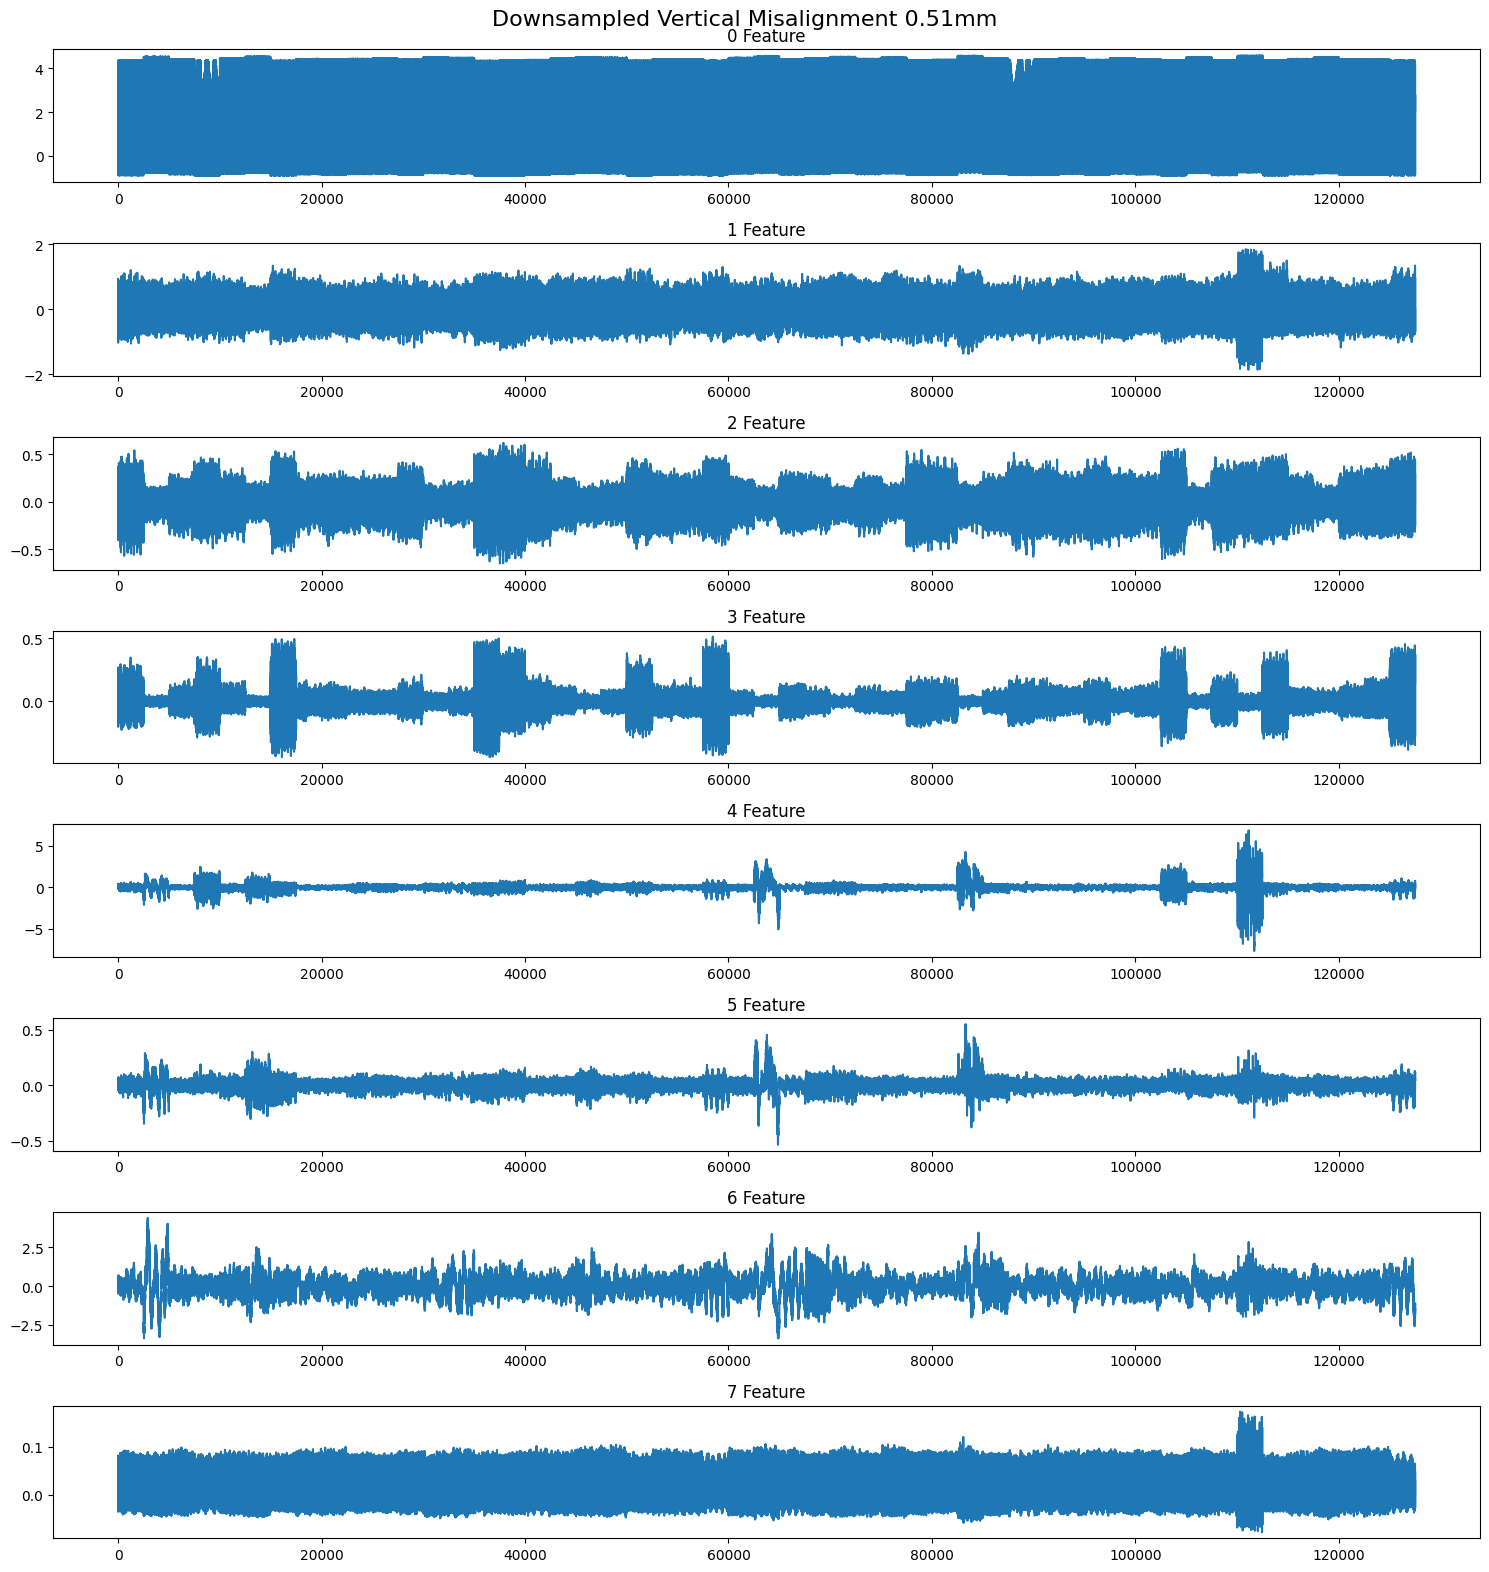

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

# Function to read data from given paths
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i, header=None)
        data_n = pd.concat([data_n, low_data], ignore_index=True)
    return data_n

# Optimized function to down-sample data
def downSampler(data, b=100):
    return data.groupby(data.index // b).mean()

# Function to plot all features of a dataset
def plot_data(data, title="All Features of Data"):
    fig, axs = plt.subplots(len(data.columns), sharex=False, sharey=False, figsize=(15, len(data.columns) * 2))
    fig.suptitle(title, fontsize=16)
    
    for idx, col in enumerate(data.columns):
        axs[idx].plot(data[col])
        axs[idx].set_title(f'{col} Feature')
    plt.tight_layout()
    plt.show()

# Paths for data directories
vertical_misalignment_file_names_051mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/0.51mm/*.csv")

# Reading and down-sampling the data
data_vertical_misalignment_051mm = dataReader(vertical_misalignment_file_names_051mm)
if not data_vertical_misalignment_051mm.empty:
    data_vertical_misalignment_051mm = downSampler(data_vertical_misalignment_051mm, b=100)

# Plotting the downsampled data
if not data_vertical_misalignment_051mm.empty:
    plot_data(data_vertical_misalignment_051mm, title="Downsampled Vertical Misalignment 0.51mm")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Autocorrelation function
def FFT(data):
    """
    Performs autocorrelation using FFT and returns the result as a DataFrame.
    """
    autocorr = signal.fftconvolve(data, data[::-1], mode='full')
    return pd.DataFrame(autocorr)

# Autocorrelating the combined data
if not data_combined.empty:
    data_combined_autocorr = FFT(data_combined.values.flatten())  # Flattening the data for autocorrelation
    data_combined_autocorr.columns = ['Autocorr']  # Naming the column appropriately
else:
    data_combined_autocorr = pd.DataFrame()  # Assigning an empty DataFrame if no data

# Plot autocorrelated data (optional visualization)
def plot_autocorrelated_data(data):
    """
    Plots autocorrelated data features.
    """
    fig, axs = plt.subplots(1, figsize=(15, 5))
    axs.plot(data['Autocorr'])  
    axs.set_title('Autocorrelation of Combined Data')  
    plt.tight_layout()
    plt.show()

# Check if autocorrelated data is not empty before plotting
if not data_combined_autocorr.empty:
    plot_autocorrelated_data(data_combined_autocorr)

# Display information if data is not empty
if not data_combined_autocorr.empty:
    print("Autocorrelated Combined Data Info:")
    print(data_combined_autocorr.info())
    print("First 5 rows of the autocorrelated combined data:")
    print(data_combined_autocorr.head())
else:
    print("No data available for autocorrelation.")


In [ ]:
data_vertical_misalignment_063mm.tail(5)

In [ ]:
def FFT(data):
    autocorr = signal.fftconvolve(data,data[::-1],mode='full')
    return pd.DataFrame(autocorr)

data_n = FFT(data_normal)
data_051mm = FFT(data_vertical_misalignment_051mm)
data_063mm = FFT(data_vertical_misalignment_063mm)
data_127mm = FFT(data_vertical_misalignment_127mm)
data_140mm = FFT(data_vertical_misalignment_140mm)
data_178mm = FFT(data_vertical_misalignment_178mm)
data_190mm = FFT(data_vertical_misalignment_190mm)


data_n.head()

In [14]:
import pandas as pd
import numpy as np
import glob
from scipy import signal

# Function to read data
def dataReader(path_names):
    """
    Reads all CSV files from the given paths and combines them into a single DataFrame.
    """
    data = pd.DataFrame()
    for path in path_names:
        df = pd.read_csv(path, header=None, dtype='float32')  # Use float32 to save memory
        data = pd.concat([data, df], ignore_index=True)
    return data

# Function to downsample data
def downSampler(data, factor=100):
    """
    Downsamples the data by averaging every 'factor' rows.
    """
    return data.groupby(data.index // factor).mean()

# Function to compute FFT-based autocorrelation in batches
def FFT_batch(data, batch_size=1000):
    """
    Computes FFT-based autocorrelation in smaller batches to reduce memory usage.
    """
    autocorr_result = pd.DataFrame()
    for start in range(0, len(data), batch_size):
        batch = data.iloc[start:start + batch_size]
        autocorr = signal.fftconvolve(batch, batch[::-1], mode='full')
        autocorr_result = pd.concat([autocorr_result, pd.DataFrame(autocorr)], ignore_index=True)
    return autocorr_result

# Paths for data directories
normal_file_names = glob.glob("./normal/*.csv")
vertical_misalignment_file_names_051mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/0.51mm/*.csv")
vertical_misalignment_file_names_063mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/0.63mm/*.csv")
vertical_misalignment_file_names_127mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/1.27mm/*.csv")
vertical_misalignment_file_names_140mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/1.40mm/*.csv")
vertical_misalignment_file_names_178mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/1.78mm/*.csv")
vertical_misalignment_file_names_190mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/1.90mm/*.csv")

# Read and downsample data
data_normal = downSampler(dataReader(normal_file_names), factor=100)
data_051mm = downSampler(dataReader(vertical_misalignment_file_names_051mm), factor=100)
data_063mm = downSampler(dataReader(vertical_misalignment_file_names_063mm), factor=100)
data_127mm = downSampler(dataReader(vertical_misalignment_file_names_127mm), factor=100)
data_140mm = downSampler(dataReader(vertical_misalignment_file_names_140mm), factor=100)
data_178mm = downSampler(dataReader(vertical_misalignment_file_names_178mm), factor=100)
data_190mm = downSampler(dataReader(vertical_misalignment_file_names_190mm), factor=100)

# Apply FFT in batches
if not data_normal.empty:
    data_normal_autocorr = FFT_batch(data_normal, batch_size=1000)
else:
    data_normal_autocorr = pd.DataFrame()

if not data_051mm.empty:
    data_051mm_autocorr = FFT_batch(data_051mm, batch_size=1000)
else:
    data_051mm_autocorr = pd.DataFrame()

if not data_063mm.empty:
    data_063mm_autocorr = FFT_batch(data_063mm, batch_size=1000)
else:
    data_063mm_autocorr = pd.DataFrame()

if not data_127mm.empty:
    data_127mm_autocorr = FFT_batch(data_127mm, batch_size=1000)
else:
    data_127mm_autocorr = pd.DataFrame()

if not data_140mm.empty:
    data_140mm_autocorr = FFT_batch(data_140mm, batch_size=1000)
else:
    data_140mm_autocorr = pd.DataFrame()

if not data_178mm.empty:
    data_178mm_autocorr = FFT_batch(data_178mm, batch_size=1000)
else:
    data_178mm_autocorr = pd.DataFrame()

if not data_190mm.empty:
    data_190mm_autocorr = FFT_batch(data_190mm, batch_size=1000)
else:
    data_190mm_autocorr = pd.DataFrame()

# Combine results if necessary
data_combined_autocorr = pd.concat([
    data_normal_autocorr,
    data_051mm_autocorr,
    data_063mm_autocorr,
    data_127mm_autocorr,
    data_140mm_autocorr,
    data_178mm_autocorr,
    data_190mm_autocorr
], ignore_index=True)

# Print result info
print("Autocorrelation Data Info:")
print(data_combined_autocorr.info())
print("First 5 rows of the autocorrelation data:")
print(data_combined_autocorr.head())


Autocorrelation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504247 entries, 0 to 1504246
Data columns (total 15 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1504247 non-null  float32
 1   1       1504247 non-null  float32
 2   2       1504247 non-null  float32
 3   3       1504247 non-null  float32
 4   4       1504247 non-null  float32
 5   5       1504247 non-null  float32
 6   6       1504247 non-null  float32
 7   7       1504247 non-null  float32
 8   8       1504247 non-null  float32
 9   9       1504247 non-null  float32
 10  10      1504247 non-null  float32
 11  11      1504247 non-null  float32
 12  12      1504247 non-null  float32
 13  13      1504247 non-null  float32
 14  14      1504247 non-null  float32
dtypes: float32(15)
memory usage: 86.1 MB
None
First 5 rows of the autocorrelation data:
         0         1         2         3         4         5         6   \
0  0.179670  0.489200 -0.300233  

In [17]:
data_combined_autocorr.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.179670,0.489200,-0.300233,0.192070,0.144579,0.012069,0.203189,0.298652,-0.074049,0.103031,0.075043,-0.001934,0.051262,-0.013958,0.000818
1,-3.324181,1.584126,0.472705,-0.218056,-0.197845,-0.207951,-1.861757,0.150509,-0.209070,-0.000253,-0.010455,-0.016997,0.069794,-0.029983,0.002680
2,-3.444666,-3.033021,-1.136636,-0.199726,1.680472,0.203906,-1.289845,0.201018,-0.105478,-0.033122,0.047076,0.011041,0.039630,-0.004766,0.001368
3,-2.860554,-2.076624,-1.433129,-0.298795,0.664758,0.442834,0.938430,0.126462,-0.008344,0.045700,0.059769,-0.015714,-0.061650,0.022717,-0.002812
4,-1.664052,4.100052,-1.559325,0.044688,-0.260315,-0.120336,0.465138,-0.360028,-0.213421,-0.040494,0.057493,-0.006488,0.014264,0.004467,-0.002034


In [18]:
data_combined_autocorr.shape


(1504247, 15)

In [19]:
from sklearn.preprocessing import LabelEncoder

# Create label DataFrames for each dataset
y_1 = pd.DataFrame(np.ones(len(data_normal), dtype=int))  # Label: 1
y_2 = pd.DataFrame(np.full(len(data_051mm), 2))           # Label: 2
y_3 = pd.DataFrame(np.full(len(data_063mm), 3))           # Label: 3
y_4 = pd.DataFrame(np.full(len(data_127mm), 4))           # Label: 4
y_5 = pd.DataFrame(np.full(len(data_140mm), 5))           # Label: 5
y_6 = pd.DataFrame(np.full(len(data_178mm), 6))           # Label: 6
y_7 = pd.DataFrame(np.full(len(data_190mm), 7))           # Label: 7

# Combine labels into a single DataFrame
y = pd.concat([y_1, y_2, y_3, y_4, y_5, y_6, y_7], ignore_index=True)

# Flatten the labels and encode them
y_flat = y.values.ravel()
y_encoded = LabelEncoder().fit_transform(y_flat)

# Convert encoded labels back to DataFrame
y_encoded_df = pd.DataFrame(y_encoded, columns=["Encoded Labels"])

# Sample 10 rows for verification
print("Sample encoded labels:")
print(y_encoded_df.sample(10))

# Train-test split can now use y_encoded_df as the target labels


Sample encoded labels:
        Encoded Labels
635027               5
177505               1
405287               3
118363               0
646055               5
558977               4
213583               1
633886               5
190321               1
452174               3


In [20]:
# Combine all datasets into a single DataFrame
data = pd.concat([
    data_normal, 
    data_051mm, 
    data_063mm, 
    data_127mm, 
    data_140mm, 
    data_178mm, 
    data_190mm
], ignore_index=True)

# Assign labels to each dataset
y_1 = pd.DataFrame(np.ones(len(data_normal), dtype=int))  # Label: 1
y_2 = pd.DataFrame(np.full(len(data_051mm), 2))           # Label: 2
y_3 = pd.DataFrame(np.full(len(data_063mm), 3))           # Label: 3
y_4 = pd.DataFrame(np.full(len(data_127mm), 4))           # Label: 4
y_5 = pd.DataFrame(np.full(len(data_140mm), 5))           # Label: 5
y_6 = pd.DataFrame(np.full(len(data_178mm), 6))           # Label: 6
y_7 = pd.DataFrame(np.full(len(data_190mm), 7))           # Label: 7

# Concatenate all labels into a single DataFrame
y = pd.concat([y_1, y_2, y_3, y_4, y_5, y_6, y_7], ignore_index=True)

# Flatten and encode labels
y_flat = y.values.ravel()
y_encoded = LabelEncoder().fit_transform(y_flat)

# Convert encoded labels to a DataFrame
y_encoded_df = pd.DataFrame(y_encoded, columns=["Encoded Labels"])

# Print shapes for verification
print("Shape of concatenated data:", data.shape)
print("Shape of encoded labels:", y_encoded_df.shape)

# Sample 10 rows for verification
print("Sample encoded labels:")
print(y_encoded_df.sample(10))

# `data` and `y_encoded_df` are now aligned for further processing


Shape of concatenated data: (752500, 8)
Shape of encoded labels: (752500, 1)
Sample encoded labels:
        Encoded Labels
416909               3
698426               5
599841               4
165078               1
452336               3
109265               0
574029               4
737840               5
346623               2
215464               1


In [21]:
data

,0,1,2,3,4,5,6,7
0,-0.799047,0.271861,0.008357,-0.071606,-0.080229,-0.015787,-0.478902,0.040704
1,-0.731127,-0.754449,-0.173588,-0.017898,0.342850,0.060131,-0.281925,0.081434
2,-0.729496,-0.282760,-0.031706,-0.112520,0.128216,0.039894,0.109272,0.002567
3,-0.578140,0.936058,-0.346348,0.025668,-0.079910,-0.003122,-0.069492,-0.003525
4,-0.613504,-0.159313,-0.029005,0.187303,0.299172,0.026656,-0.256507,0.010149
...,...,...,...,...,...,...,...,...
752495,-0.563378,-0.017438,-0.042283,0.008426,-0.210062,-0.028684,-2.089789,-0.003659
752496,-0.556978,0.465113,0.109426,0.028025,-0.257756,-0.041392,-2.226908,-0.039480
752497,-0.708134,0.284953,-0.070498,0.008666,-0.290890,-0.049998,-2.323958,-0.016756
752498,-0.629393,0.091821,-0.107349,0.008229,-0.240371,-0.056091,-2.185951,0.015009


In [31]:
x_train, x_test, y_train, y_test = train_test_split(data,y_encoded, test_size=0.3, shuffle=True)

Model: Random Forest
Accuracy: 0.36
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.36      0.38     38294
           1       0.43      0.40      0.41     37225
           2       0.35      0.37      0.36     37488
           3       0.29      0.26      0.27     37679
           4       0.34      0.32      0.33     37634
           5       0.36      0.48      0.41     37430

    accuracy                           0.36    225750
   macro avg       0.36      0.36      0.36    225750
weighted avg       0.36      0.36      0.36    225750



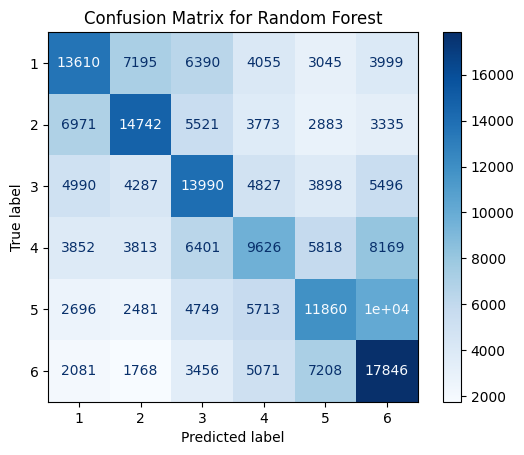

Model: Decision Tree
Accuracy: 0.27
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.29      0.29     38294
           1       0.31      0.32      0.31     37225
           2       0.25      0.25      0.25     37488
           3       0.22      0.22      0.22     37679
           4       0.25      0.25      0.25     37634
           5       0.29      0.29      0.29     37430

    accuracy                           0.27    225750
   macro avg       0.27      0.27      0.27    225750
weighted avg       0.27      0.27      0.27    225750



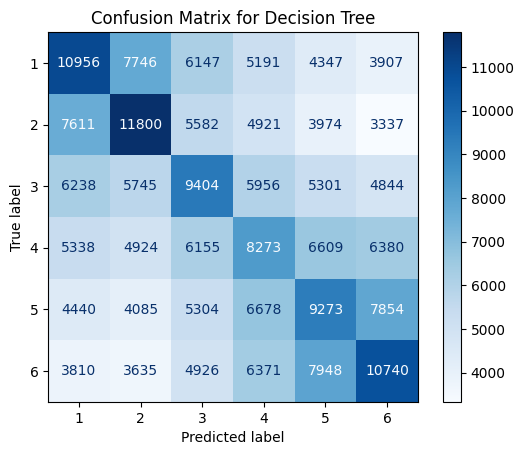

Model: K-Nearest Neighbors
Accuracy: 0.27
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.36      0.30     38294
           1       0.31      0.33      0.32     37225
           2       0.26      0.26      0.26     37488
           3       0.23      0.21      0.22     37679
           4       0.27      0.22      0.24     37634
           5       0.32      0.26      0.28     37430

    accuracy                           0.27    225750
   macro avg       0.27      0.27      0.27    225750
weighted avg       0.27      0.27      0.27    225750



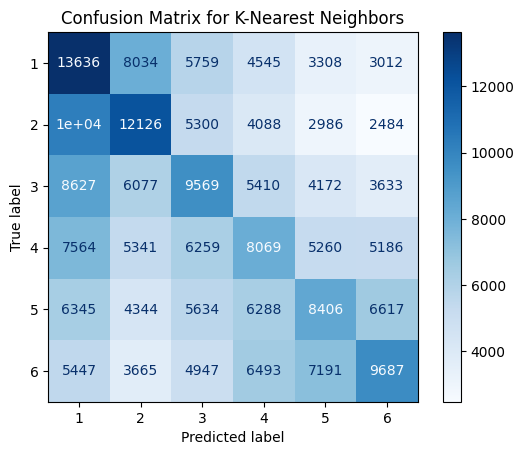

In [32]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

def train_and_evaluate_models(x_train, y_train, x_test, y_test):
    for model_name, model in classifiers.items():
        # Fit the model
        model.fit(x_train, y_train)
        
        # Make predictions
        y_pred = model.predict(x_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Display results
        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy:.2f}")
        report = classification_report(y_test, y_pred)
        print("Classification Report:")
        print(report)
        # Plot confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

# Run the function to train and evaluate all models
train_and_evaluate_models(x_train, y_train, x_test, y_test)